In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from keras.utils import np_utils
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [2]:
import numpy as np
import keras
import tensorflow as tf
import csv
from keras import Model, Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
import itertools
from itertools import combinations
from matplotlib import pyplot as plt

def read_csv_file(filename):
    dataset = []
    with open(filename, "r") as f:
        data = csv.reader(f, delimiter='\n')
        header = next(data)
        numberColumns = len(header)
        counter = 0
        for row in data:
            columns = list(row[0].split(','))
            newcolumns = []
            for number in columns:
                newcolumns.append(float(number))

            dataset.append(newcolumns)
            counter += 1

    dataset = np.asarray(dataset)
    return dataset

train = read_csv_file("train.csv")
labels = train[:,-1].astype(int)
train = train[:,:-1]
test = read_csv_file('test.csv')
# labels = keras.utils.to_categorical(labels, 2)
print("train data: ", train.shape)
# print("test data: ", test.shape)



train data:  (120, 595)


In [3]:
from keras.utils import np_utils
labels = np_utils.to_categorical(labels)

In [4]:
'''from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
# feature extraction
selection = SelectKBest(score_func=chi2, k=32)
fit = selection.fit(train, labels)
# summarize scores
np.set_printoptions(precision=3)
features = fit.transform(train)
train = features'''

'from sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import chi2\n# load data\n# feature extraction\nselection = SelectKBest(score_func=chi2, k=32)\nfit = selection.fit(train, labels)\n# summarize scores\nnp.set_printoptions(precision=3)\nfeatures = fit.transform(train)\ntrain = features'

In [85]:
train.shape

(120, 595)

In [91]:
scaler = StandardScaler()
scaler.fit(train)
X_sc_train = scaler.transform(train)
X_sc_test = scaler.transform(test)

In [70]:
NCOMPONENTS = 64

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)

print(X_sc_train.shape)
print(X_pca_train.shape)

(120, 595)
(120, 64)


In [92]:
X_sc_train = np.concatenate((X_sc_train[:,:3], X_sc_train[:,4:]), axis=1)
X_sc_test = np.concatenate((X_sc_test[:,:3], X_sc_test[:,4:]), axis=1)
X_sc_train.shape
X_sc_test.shape

(80, 594)

In [103]:
NCOMPONENTS = 594
model = Sequential()
layers = 4
units = 256

model.add(Dense(units, input_dim=NCOMPONENTS, activation='relu'))
model.add(GaussianNoise(0.2))
for i in range(layers):
    model.add(Dense(np.int(units/(2*(i+1))), activation='relu'))
    model.add(GaussianNoise(pca_std))
    model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(X_sc_train, labels, epochs=15, batch_size=32, validation_split=0.15, verbose=1)



Train on 102 samples, validate on 18 samples
Epoch 1/15
102/102 [==============================] - 3s 31ms/step - loss: 3.8028 - categorical_accuracy: 0.5000 - val_loss: 0.7061 - val_categorical_accuracy: 0.5000
Epoch 2/15
102/102 [==============================] - 0s 205us/step - loss: 3.6467 - categorical_accuracy: 0.4510 - val_loss: 0.7418 - val_categorical_accuracy: 0.4444
Epoch 3/15
102/102 [==============================] - 0s 263us/step - loss: 3.0648 - categorical_accuracy: 0.4608 - val_loss: 0.7625 - val_categorical_accuracy: 0.4444
Epoch 4/15
102/102 [==============================] - 0s 226us/step - loss: 3.1778 - categorical_accuracy: 0.4804 - val_loss: 0.7201 - val_categorical_accuracy: 0.5556
Epoch 5/15
102/102 [==============================] - 0s 207us/step - loss: 2.8475 - categorical_accuracy: 0.5196 - val_loss: 0.6901 - val_categorical_accuracy: 0.6111
Epoch 6/15
102/102 [==============================] - 0s 221us/step - loss: 2.9583 - categorical_accuracy: 0.5490 - 

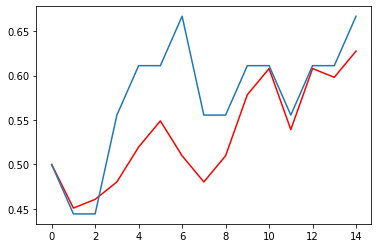

In [104]:
plt.plot(history.history['categorical_accuracy'], color='r')
plt.plot(history.history['val_categorical_accuracy'])

In [99]:
predictions = model.predict_classes(X_sc_test, verbose=0)

In [100]:
predictions[:5]

array([0, 0, 0, 1, 0])

In [105]:
with open("submission_66.csv", 'w') as f:
    f.write("ID,Predicted\n")
    for i in range(len(predictions)):
        writestr = str(i+1) + ','+ str(predictions[i]) + '\n'
        f.write(writestr)
f.close()
            
        